<a href="https://colab.research.google.com/github/RodrigoAB93/Classificador_Galaxias/blob/master/GalaxyClassifier(Oficial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astroquery --quiet
!pip install pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 75.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import numpy as np
import pandas as pd
import pickle
import sklearn

In [ ]:
from astroquery.sdss import SDSS

def get_data_from_sdss():
  query = ("SELECT "
          "u, r, g, i, z, "
          "deVAB_u, deVAB_g, deVAB_r, deVAB_i, deVAB_z, "
          "mCr4_u, mCr4_g, mCr4_r, mCr4_i, mCr4_z, "
          "petroR50_r, petroR90_r, petroR50_u, petroR90_u, petroR50_z, petroR90_z, "
          "zs.spiral, zs.elliptical "
          "FROM PhotoObjAll as p "
          "JOIN zooSpec as zs "
          "ON p.objid = zs.objid "
          "WHERE zs.uncertain != 1")

  return SDSS.query_sql(query, data_release=17, cache=True).to_pandas()

df = get_data_from_sdss()

df

,u,r,g,i,z,deVAB_u,deVAB_g,deVAB_r,deVAB_i,deVAB_z,...,mCr4_i,mCr4_z,petroR50_r,petroR90_r,petroR50_u,petroR90_u,petroR50_z,petroR90_z,spiral,elliptical
0,21.30107,17.60633,19.02937,17.04571,16.68989,0.200008,0.794812,0.809367,0.755604,0.746870,...,2.350954,2.323524,1.940162,5.956096,4.370909,8.823489,2.014271,6.223602,0,1
1,20.68344,17.56325,18.69490,17.04217,16.59908,0.349929,0.360784,0.378628,0.387458,0.426578,...,2.213694,2.216737,2.133937,5.503888,1.768298,3.193196,1.927497,4.552603,1,0
2,20.06419,17.88697,18.71750,17.45960,17.16274,0.788055,0.950280,0.925031,0.914393,0.999758,...,2.334856,2.339622,2.290753,4.955610,1.717528,2.488525,2.212938,4.919927,1,0
3,19.98335,16.77948,17.82543,16.28585,15.89315,0.623265,0.407284,0.408504,0.405601,0.428269,...,2.254988,2.271034,1.857053,5.512988,2.454365,6.181480,1.809562,5.435440,1,0
4,18.97349,17.04639,17.54252,16.81821,16.66867,0.249991,0.327550,0.334394,0.318385,0.340031,...,2.422430,2.419880,5.604107,13.054510,3.279607,5.334966,3.753458,7.156629,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251310,19.35978,17.49845,18.22867,17.05730,16.73993,0.559993,0.150001,0.170179,0.199949,0.158425,...,2.181309,2.324996,4.128633,10.011500,10.117840,17.395960,2.603431,6.113681,1,0
251311,18.90598,17.50693,17.85950,17.35873,17.25365,0.084744,0.114656,0.125776,0.127024,0.116421,...,2.187688,2.225552,5.247710,12.452800,6.665245,22.033880,5.522473,15.672820,1,0
251312,17.63556,16.04044,16.53746,15.61966,15.42547,0.335217,0.413055,0.439882,0.449961,0.438061,...,2.333827,2.323362,2.820320,7.549156,2.703854,7.275341,2.562256,6.730236,1,0
251313,18.14697,16.22494,16.85450,15.89224,15.63664,0.444642,0.453881,0.463530,0.450030,0.445269,...,2.101498,2.078301,4.131282,9.104055,4.771958,13.515610,3.827582,7.850143,1,0


In [ ]:
df = df.drop(df[df.eq(-9999).any(axis=1)].index)

In [ ]:

data = pd.DataFrame()
data['u_g'] = df['u'] - df['g']
data['g_r'] = df['g'] - df['r']
data['r_i'] = df['r'] - df['i']
data['i_z'] = df['i'] - df['z']
data = data.assign(**df[['mCr4_u', 'mCr4_g', 'mCr4_r', 'mCr4_i', 'mCr4_z']])
data['eccentricity'] = df[['deVAB_u', 'deVAB_g', 'deVAB_r', 'deVAB_i', 'deVAB_z']].mean(axis=1)
data['concentration_u'] = df['petroR50_u'] / df['petroR90_u']
data['concentration_r'] = df['petroR50_r'] / df['petroR90_r']
data['concentration_z'] = df['petroR50_z'] / df['petroR90_z']

data['class'] = df[['spiral', 'elliptical']].idxmax(axis=1)

data

,u_g,g_r,r_i,i_z,mCr4_u,mCr4_g,mCr4_r,mCr4_i,mCr4_z,eccentricity,concentration_u,concentration_r,concentration_z,class
0,2.27170,1.42304,0.56062,0.35582,2.094508,2.336682,2.354807,2.350954,2.323524,0.661332,0.495372,0.325744,0.323650,elliptical
1,1.98854,1.13165,0.52108,0.44309,2.087561,2.197040,2.189261,2.213694,2.216737,0.380675,0.553771,0.387714,0.423384,spiral
2,1.34669,0.83053,0.42737,0.29686,2.118602,2.274808,2.326835,2.334856,2.339622,0.915504,0.690179,0.462254,0.449791,spiral
3,2.15792,1.04595,0.49363,0.39270,2.340375,2.282917,2.272912,2.254988,2.271034,0.454584,0.397051,0.336851,0.332919,spiral
4,1.43097,0.49613,0.22818,0.14954,0.722800,2.377427,2.439711,2.422430,2.419880,0.314070,0.614738,0.429285,0.524473,spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251310,1.13111,0.73022,0.44115,0.31737,2.153536,2.009338,2.116789,2.181309,2.324996,0.247709,0.581620,0.412389,0.425837,spiral
251311,1.04648,0.35257,0.14820,0.10508,0.603369,2.191302,2.197701,2.187688,2.225552,0.113724,0.302500,0.421408,0.352360,spiral
251312,1.09810,0.49702,0.42078,0.19419,2.211927,2.296901,2.333024,2.333827,2.323362,0.415235,0.371646,0.373594,0.380708,spiral
251313,1.29247,0.62956,0.33270,0.25560,2.032430,1.986033,2.069453,2.101498,2.078301,0.451470,0.353070,0.453785,0.487581,spiral


In [ ]:
data['class'].value_counts()

spiral        188325
elliptical     60708
Name: class, dtype: int64

In [ ]:
features = data.drop(['class'], axis=1)
targets = data['class']

In [ ]:
labels = targets.unique()
labels

array(['elliptical', 'spiral'], dtype=object)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def tuner(clf, dist, X, y):
  rs_clf = RandomizedSearchCV(estimator=clf, random_state=1, n_jobs=-1, param_distributions=dist, cv=10)

  search = rs_clf.fit(X=X, y=y)

  return search.best_params_

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
  cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

  disp.plot(cmap=plt.cm.Blues)

  plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def reporter(clf, X, y, labels):

  predictions = clf.predict(X)

  plot_confusion_matrix(y_true=y, y_pred=predictions, labels=labels)

  print(classification_report(y_true=y, y_pred=predictions))


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(features, targets, stratify=targets, test_size=0.1)

In [ ]:
X_train = X_train.astype(np.float64)


In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, stratify=y_test_valid, test_size=0.5)

In [ ]:
max_depths = [i for i in range(1, 30, 2)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_valid_normalized = scaler.transform(X_valid)
X_test_normalized = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Melhores parâmetros: {'n_neighbors': 7}
Train


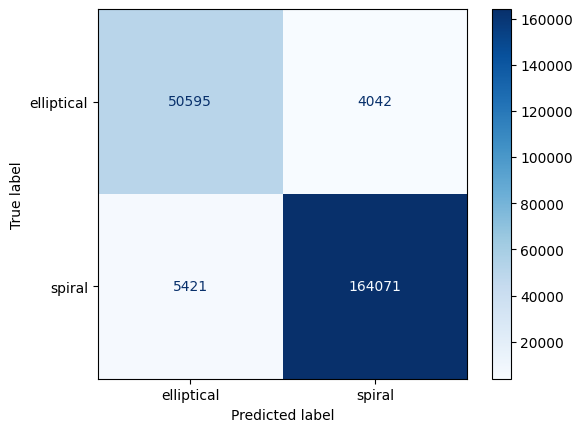

              precision    recall  f1-score   support

  elliptical       0.90      0.93      0.91     54637
      spiral       0.98      0.97      0.97    169492

    accuracy                           0.96    224129
   macro avg       0.94      0.95      0.94    224129
weighted avg       0.96      0.96      0.96    224129

Cross Validation


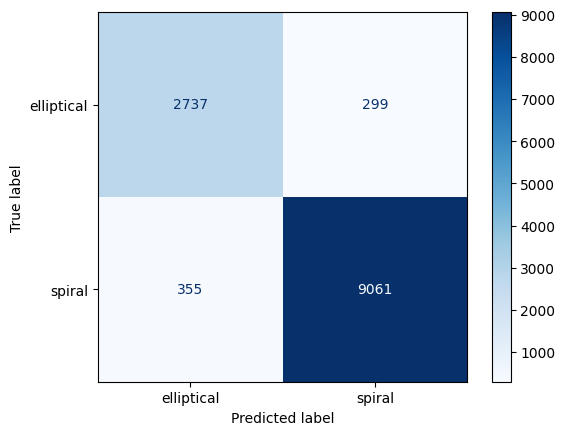

              precision    recall  f1-score   support

  elliptical       0.89      0.90      0.89      3036
      spiral       0.97      0.96      0.97      9416

    accuracy                           0.95     12452
   macro avg       0.93      0.93      0.93     12452
weighted avg       0.95      0.95      0.95     12452

Test


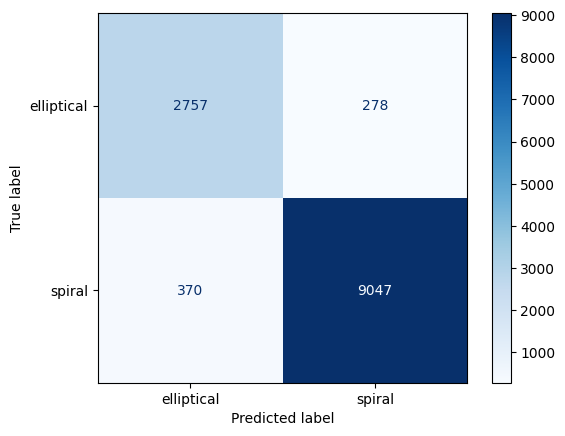

              precision    recall  f1-score   support

  elliptical       0.88      0.91      0.89      3035
      spiral       0.97      0.96      0.97      9417

    accuracy                           0.95     12452
   macro avg       0.93      0.93      0.93     12452
weighted avg       0.95      0.95      0.95     12452



In [ ]:
dist = dict(n_neighbors=[i for i in range(1, 100, 2)])

knc = KNeighborsClassifier(n_jobs=-1)

best = tuner(knc, dist, X_valid_normalized, y_valid)

print(f'Melhores parâmetros: {best}')

knc = KNeighborsClassifier(n_jobs=-1, n_neighbors=best['n_neighbors'])

knc.fit(X_train_normalized, y_train)

print('Train')
reporter(knc, X_train_normalized, y_train, labels)
print('Cross Validation')
reporter(knc, X_valid_normalized, y_valid, labels)
print('Test')
reporter(knc, X_test_normalized, y_test, labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dist = dict(max_depth=max_depths)

dtc = DecisionTreeClassifier(random_state=1)

best = tuner(dtc, dist, X_valid, y_valid)

print(f'Melhores parâmetros: {best}')

dtc = DecisionTreeClassifier(random_state=1, max_depth=best['max_depth'])
result = dtc.fit(X_train, y_train)



Melhores parâmetros: {'max_depth': 7}


In [ ]:
pickle.dump(dtc, open('modelo-treinado-final000.pkl', 'wb'))

In [ ]:
predictions = model.predict(X_test)

predictions

array(['spiral', 'elliptical', 'spiral', ..., 'spiral', 'spiral',
       'spiral'], dtype=object)

Train


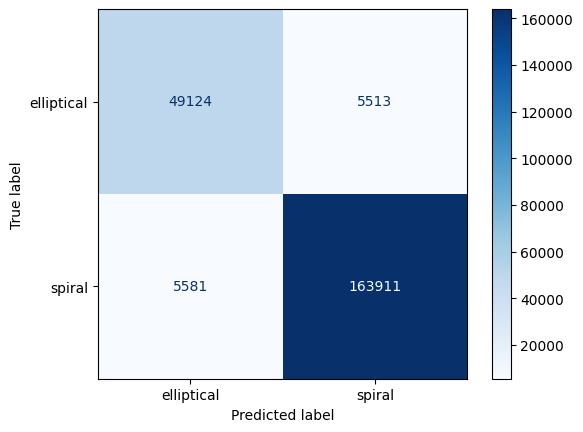

              precision    recall  f1-score   support

  elliptical       0.90      0.90      0.90     54637
      spiral       0.97      0.97      0.97    169492

    accuracy                           0.95    224129
   macro avg       0.93      0.93      0.93    224129
weighted avg       0.95      0.95      0.95    224129

Cross Validation


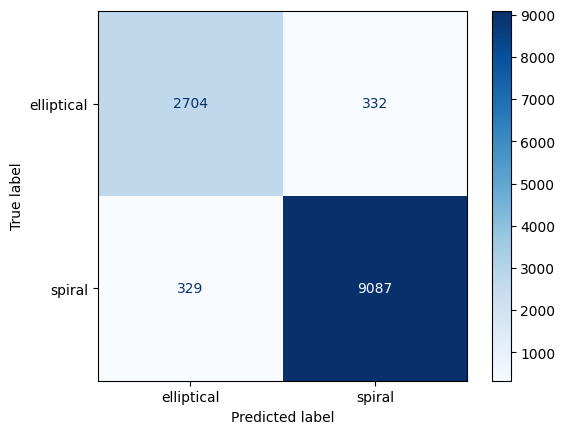

              precision    recall  f1-score   support

  elliptical       0.89      0.89      0.89      3036
      spiral       0.96      0.97      0.96      9416

    accuracy                           0.95     12452
   macro avg       0.93      0.93      0.93     12452
weighted avg       0.95      0.95      0.95     12452

Test


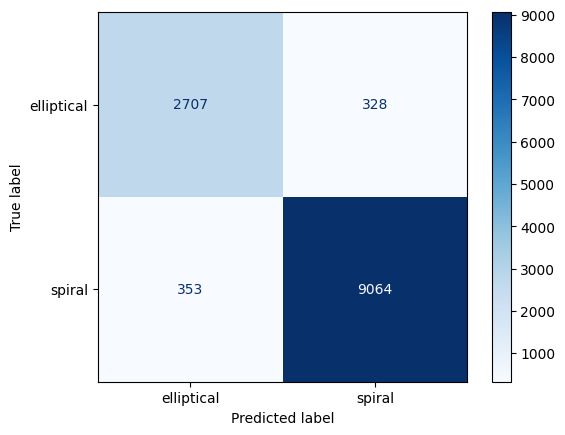

              precision    recall  f1-score   support

  elliptical       0.88      0.89      0.89      3035
      spiral       0.97      0.96      0.96      9417

    accuracy                           0.95     12452
   macro avg       0.92      0.93      0.93     12452
weighted avg       0.95      0.95      0.95     12452



In [ ]:

print('Train')
reporter(dtc, X_train, y_train, labels)
print('Cross Validation')
reporter(dtc, X_valid, y_valid, labels)
print('Test')
reporter(dtc, X_test, y_test, labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Melhores parâmetros: {'max_depth': 21}
Train


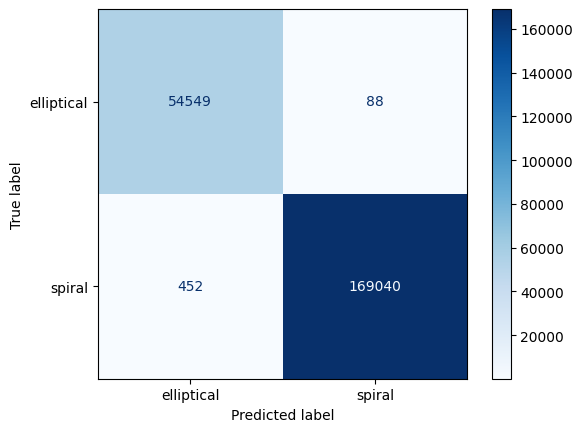

              precision    recall  f1-score   support

  elliptical       0.99      1.00      1.00     54637
      spiral       1.00      1.00      1.00    169492

    accuracy                           1.00    224129
   macro avg       1.00      1.00      1.00    224129
weighted avg       1.00      1.00      1.00    224129

Cross Validation


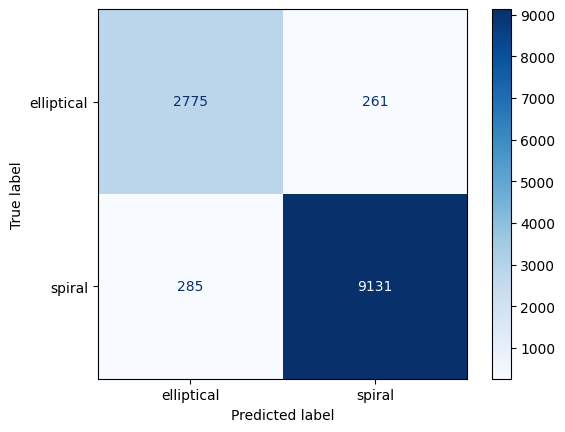

              precision    recall  f1-score   support

  elliptical       0.91      0.91      0.91      3036
      spiral       0.97      0.97      0.97      9416

    accuracy                           0.96     12452
   macro avg       0.94      0.94      0.94     12452
weighted avg       0.96      0.96      0.96     12452

Test


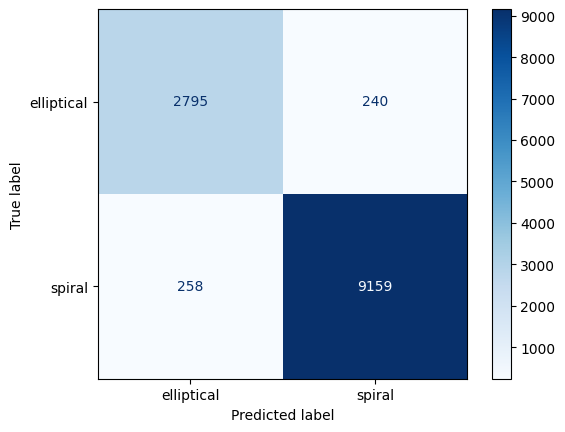

              precision    recall  f1-score   support

  elliptical       0.92      0.92      0.92      3035
      spiral       0.97      0.97      0.97      9417

    accuracy                           0.96     12452
   macro avg       0.94      0.95      0.95     12452
weighted avg       0.96      0.96      0.96     12452



In [ ]:
dist = dict(max_depth=max_depths)

rfc = RandomForestClassifier(n_jobs=-1, random_state=1)

best = tuner(rfc, dist, X_valid, y_valid)

print(f'Melhores parâmetros: {best}')

rfc = RandomForestClassifier(n_jobs=-1, random_state=1, max_depth=best['max_depth'])

rfc.fit(X_train, y_train)

print('Train')
reporter(rfc, X_train, y_train, labels)
print('Cross Validation')
reporter(rfc, X_valid, y_valid, labels)
print('Test')
reporter(rfc, X_test, y_test, labels)